In [13]:
# IMPORTS

import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# import warnings

# warnings.filterwarnings("ignore")

In [14]:
# GET DATASETS

df_features = pd.read_csv('csv/Features.csv')
df_streams = pd.read_csv('csv/Streams.csv')

In [15]:
# CONCAT DATASETS

df_final=pd.concat([df_features,df_streams],axis=1,join='inner')

# DROP USELESS COLUMNS

df_final=df_final.drop(columns=["Release Date","name","id"]).set_index("Song")
df_final

,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability,Artist,Streams (Billions)
Song,,,,,,,,,,,,,,
Blinding Lights,3.33,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,0.514,The Weeknd,3.449
Shape of You,3.90,0.652,1,-3.183,0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,0.825,Ed Sheeran,3.398
Dance Monkey,3.49,0.588,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,0.824,Tones And I,2.770
Someone You Loved,3.04,0.405,1,-5.679,1,0.0319,0.75100,0.000000,0.1050,0.446,109.891,0.501,Lewis Capaldi,2.680
Rockstar,3.64,0.520,5,-6.136,0,0.0712,0.12400,0.000070,0.1310,0.129,159.801,0.585,Post Malone featuring 21 Savage,2.620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7 Years,3.96,0.473,10,-5.829,1,0.0514,0.28700,0.000000,0.3910,0.340,119.992,0.765,Lukas Graham,1.529
Yellow,4.45,0.661,11,-7.227,1,0.0281,0.00239,0.000121,0.2340,0.285,173.372,0.429,Coldplay,1.527
Sugar,2.90,0.816,0,-4.209,1,0.0465,0.12200,0.000000,0.3350,0.557,95.390,0.548,Maroon 5,1.524


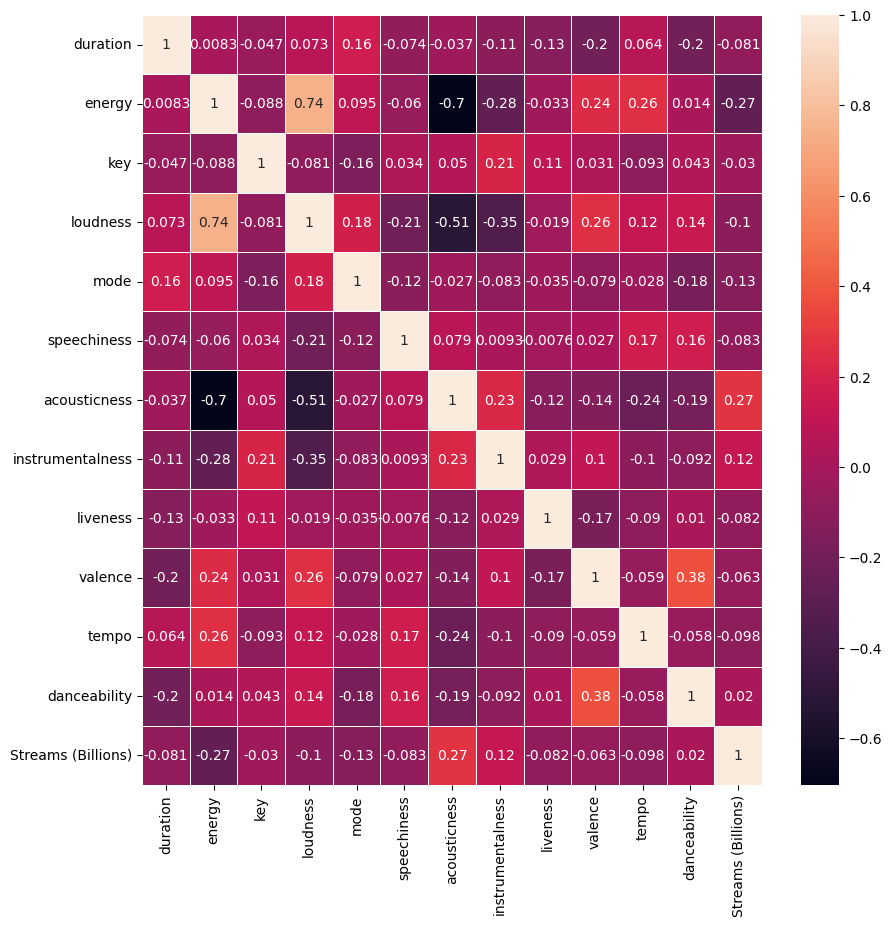

In [16]:
df=df_final.drop(columns=["Artist"])
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)
plt.show()

array([[3.27305606e-01, 7.49656121e-01, 9.09090909e-02, ...,
        8.65011791e-01, 2.99483649e-01, 1.00000000e+00],
       [4.30379747e-01, 6.42365887e-01, 9.09090909e-02, ...,
        1.89728728e-01, 8.34767642e-01, 9.73547718e-01],
       [3.56238698e-01, 5.54332875e-01, 5.45454545e-01, ...,
        2.08179576e-01, 8.33046472e-01, 6.47821577e-01],
       ...,
       [2.49547920e-01, 8.67950481e-01, 0.00000000e+00, ...,
        1.84445484e-01, 3.58003442e-01, 1.55601660e-03],
       [4.15913201e-01, 8.41815681e-01, 1.81818182e-01, ...,
        9.27321657e-01, 5.42168675e-01, 5.18672199e-04],
       [1.00000000e+00, 5.06189821e-01, 4.54545455e-01, ...,
        3.39369611e-01, 2.25473322e-01, 0.00000000e+00]])

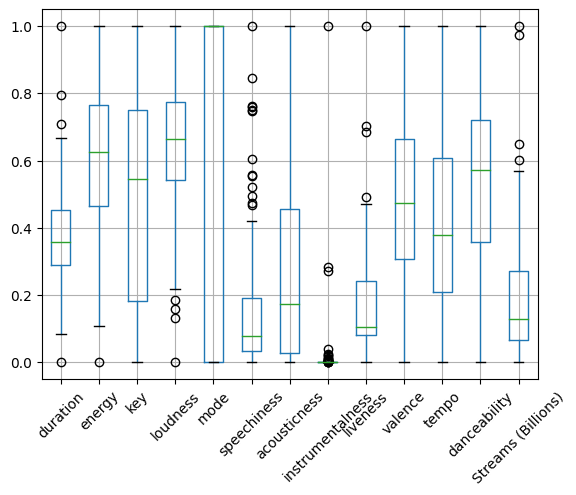

In [17]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
min_max
min_max.fit(df)
min_max.data_min_
min_max.data_max_
min_max.transform(df)
pd.DataFrame(min_max.transform(df), columns=df.columns, index=df.index).boxplot(rot = 45)
df_minmax = min_max.fit_transform(df)
df_minmax

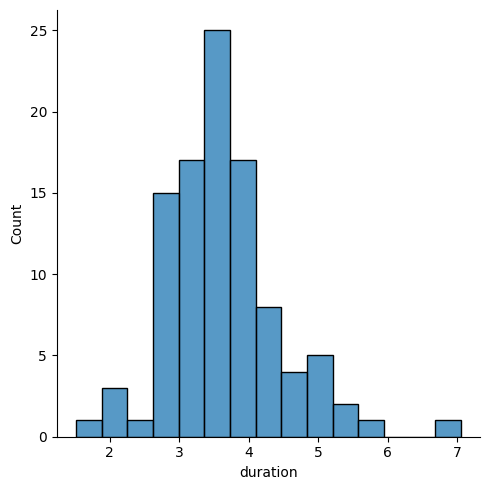

In [18]:
sns.displot(df_final, x='duration')
plt.show()

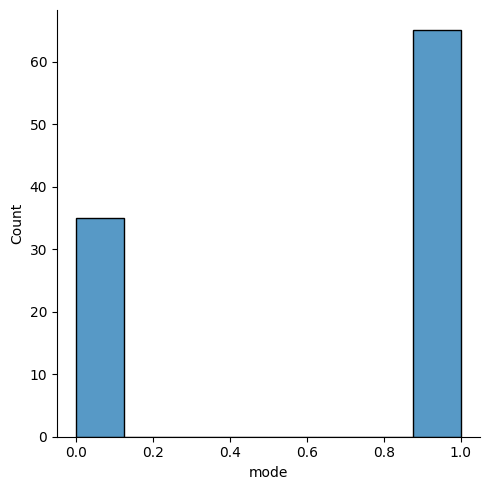

In [19]:
sns.displot(df_final, x='mode')
plt.show()

In [22]:
from sklearn import cluster
kmeans_minmax = cluster.KMeans(n_clusters=4, random_state=42)
# kmeans_minmax
kmeans_minmax.fit(df_minmax)

KMeans(n_clusters=4, random_state=42)

In [23]:
kmeans_minmax.n_iter_ 

14

In [24]:
kmeans_minmax.labels_

array([3, 2, 2, 1, 2, 1, 3, 1, 2, 0, 0, 1, 1, 1, 3, 1, 1, 2, 2, 2, 3, 1,
       1, 2, 0, 3, 1, 0, 1, 3, 1, 2, 1, 3, 2, 3, 2, 3, 0, 0, 0, 0, 3, 3,
       3, 0, 1, 2, 3, 3, 3, 0, 0, 3, 1, 0, 0, 3, 1, 1, 3, 3, 3, 0, 3, 1,
       3, 3, 3, 1, 0, 0, 1, 3, 3, 2, 0, 3, 1, 3, 3, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 1])

In [25]:
kmeans_minmax.inertia_

47.73187402134002

In [27]:
df['cl_minmax']=kmeans_minmax.labels_
df.sort_values('cl_minmax')
df

,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability,Streams (Billions),cl_minmax
Song,,,,,,,,,,,,,,
Blinding Lights,3.33,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,0.514,3.449,3
Shape of You,3.90,0.652,1,-3.183,0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,0.825,3.398,2
Dance Monkey,3.49,0.588,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,0.824,2.770,2
Someone You Loved,3.04,0.405,1,-5.679,1,0.0319,0.75100,0.000000,0.1050,0.446,109.891,0.501,2.680,1
Rockstar,3.64,0.520,5,-6.136,0,0.0712,0.12400,0.000070,0.1310,0.129,159.801,0.585,2.620,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7 Years,3.96,0.473,10,-5.829,1,0.0514,0.28700,0.000000,0.3910,0.340,119.992,0.765,1.529,1
Yellow,4.45,0.661,11,-7.227,1,0.0281,0.00239,0.000121,0.2340,0.285,173.372,0.429,1.527,3
Sugar,2.90,0.816,0,-4.209,1,0.0465,0.12200,0.000000,0.3350,0.557,95.390,0.548,1.524,3


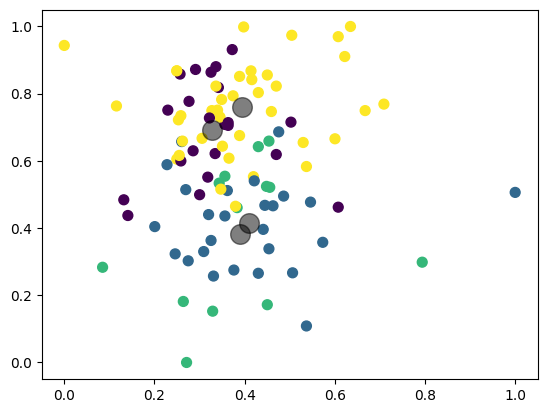

In [28]:
y_kmeans = kmeans_minmax.predict(df_minmax)
y_kmeans
centers = kmeans_minmax.cluster_centers_
centers
plt.figure()
plt.scatter(df_minmax[ : , 0], df_minmax[ : , 1], c=y_kmeans, s=50, cmap='viridis')
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'y'}
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

*** For n_clusters = 2, inertia is 60.81012556697867 ***

*** For n_clusters = 3, inertia is 53.20947042039874 ***

*** For n_clusters = 4, inertia is 47.73187402134002 ***

*** For n_clusters = 5, inertia is 43.85306914841867 ***

*** For n_clusters = 6, inertia is 41.30510782928991 ***

*** For n_clusters = 7, inertia is 40.550241435384415 ***

*** For n_clusters = 8, inertia is 37.543108998363216 ***

*** For n_clusters = 9, inertia is 35.892832773665454 ***

*** For n_clusters = 10, inertia is 33.48884970780699 ***



Text(0.5, 1.0, 'Optimal nb of clusters')

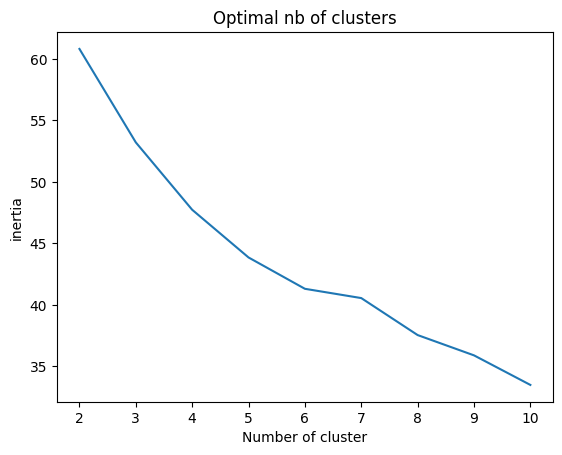

In [29]:
scores = {}
for k in range(2, 11):
    km = cluster.KMeans(n_clusters=k, random_state=42)
    km.fit(df_minmax)
    scores[k] = km.inertia_
    print(f'*** For n_clusters = {k}, inertia is {km.inertia_} ***\n')
plt.figure()
plt.plot(list(scores.keys()), list(scores.values()))
plt.xlabel("Number of cluster")
plt.ylabel("inertia")
plt.title("Optimal nb of clusters")

In [20]:
# ENCODE

# data = pd.get_dummies(df_final, columns=['key', 'mode'])

# MINMAX

# scaler = MinMaxScaler()
# col = ['energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'danceability']
# data[col] = scaler.fit_transform(data[col])

# SEP TARGET

# X = data.drop("Streams (Billions)",axis=1)
# y = data["Streams (Billions)"]

#

# ros = RandomOverSampler()
# X_ros, y_ros = ros.fit_resample(X, y)

# X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.1, random_state=101)

# scaler = StandardScaler()
# scaled_X_train = scaler.fit_transform(X_train)
# scaled_X_test = scaler.transform(X_test)


In [21]:
trees = 100
max_features = 3
results = []
names_of_models = []

model_list = [
            ('LogisticRegression', LogisticRegression()),
            ('KNeighborsClassifier', KNeighborsClassifier()),
            ('DecisionTreeClassifier', DecisionTreeClassifier()),
            ('RandomForestClassifier', RandomForestClassifier(n_estimators=trees,max_features=3))
]


for name, model in model_list:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, scaled_X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names_of_models.append(name)
    res = "{}: \n\t mean: {} \n\t std: ({})".format(name, cv_results.mean(), cv_results.std())
    print(res)

NameError: name 'cross_val_score' is not defined

In [ ]:
df_final['mode'].value_counts(normalize=True)


1    0.65
0    0.35
Name: mode, dtype: float64

In [ ]:
scatter_mat = scatter_matrix(df_final, figsize = (16,10))
# print(scatter_mat)